# KC_Housesales_Model

In [23]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



/kaggle/input/kc-housesales-data/kc_house_data.csv


Importing required packages

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Getting the dataset

In [25]:
data=pd.read_csv("data.csv")

Viewing Data and To see if if null values if any

In [26]:
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


here target variable=price

and

other are feature variables

In [27]:
data.describe(include="all")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580474e+09,NaN,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,...,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,...,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,NaN,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,...,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


2.159700e+04 == 21,597.00

5.402966e+05 ==  540,296.6

In [28]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No null values 

Hurrah!!!

finding number of uniques

In [29]:
r=data.columns
for i in r:
    print("'",i,"'has these many uniques",data[i].nunique())

' id 'has these many uniques 21420
' date 'has these many uniques 372
' price 'has these many uniques 3622
' bedrooms 'has these many uniques 12
' bathrooms 'has these many uniques 29
' sqft_living 'has these many uniques 1034
' sqft_lot 'has these many uniques 9776
' floors 'has these many uniques 6
' waterfront 'has these many uniques 2
' view 'has these many uniques 5
' condition 'has these many uniques 5
' grade 'has these many uniques 11
' sqft_above 'has these many uniques 942
' sqft_basement 'has these many uniques 306
' yr_built 'has these many uniques 116
' yr_renovated 'has these many uniques 70
' zipcode 'has these many uniques 70
' lat 'has these many uniques 5033
' long 'has these many uniques 751
' sqft_living15 'has these many uniques 777
' sqft_lot15 'has these many uniques 8682


we can drop id column as they are so unique

In [30]:
data=data.drop(["id"],axis=1)

let us separate features and target variable

In [31]:
X=data.drop(["price"],axis=1)
y=data["price"]

# EDA

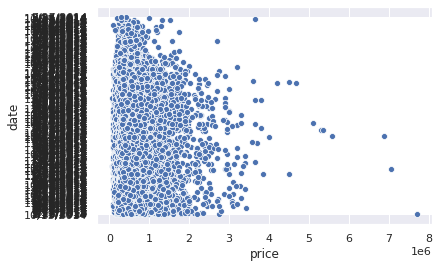

In [32]:
ax = sns.scatterplot(x="price", y="date", data=data)

there are few ouliers otherwise uniformly distributed

In [33]:
X=X.drop(["date"],axis=1)

In [34]:
X.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

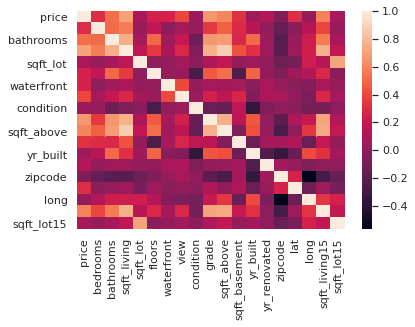

In [35]:
ax = sns.heatmap(data.corr())

all features seems to be correlated

# linear regression

In [36]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.35,random_state=0)

In [38]:
lr=LinearRegression(fit_intercept=True)
model=lr.fit(xtrain,ytrain)
prediction=lr.predict(xtest)
print("Train_Accuracy")
print(lr.score(xtrain,ytrain))
print("Test_Accuracy")
print(lr.score(xtest,ytest))

Train_Accuracy
0.694285188494628
Test_Accuracy
0.71112460702142


# RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
regressor = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=100,min_samples_leaf=4,min_samples_split=10,random_state=0)
model=regressor.fit(xtrain, ytrain)
y_pred = regressor.predict(xtest)
print("Train_Accuracy")
print(regressor.score(xtrain,ytrain))
print("Test_Accuracy")
print(regressor.score(xtest,ytest))

Train_Accuracy
0.9428627794838156
Test_Accuracy
0.8824211831243362
